In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Andrew\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
agg_results= pd.read_csv('aggregated_results.csv')

In [3]:
agg_results= agg_results.sort_values('agent')

In [4]:
agg_results

,agent,scoring_function,student_scoring_function,Success_Rate,Round
0,ID_Improved,improved_score,weighted_moves,65.29,1
2,ID_Improved,improved_score,center_weighted,69.14,2
4,ID_Improved,improved_score,center_decay,74.43,3
1,Student,weighted_moves,weighted_moves,70.43,1
3,Student,center_weighted,center_weighted,71.86,2
5,Student,center_decay,center_decay,79.00,3


In [34]:
test= sns.color_palette('pastel')[2:]

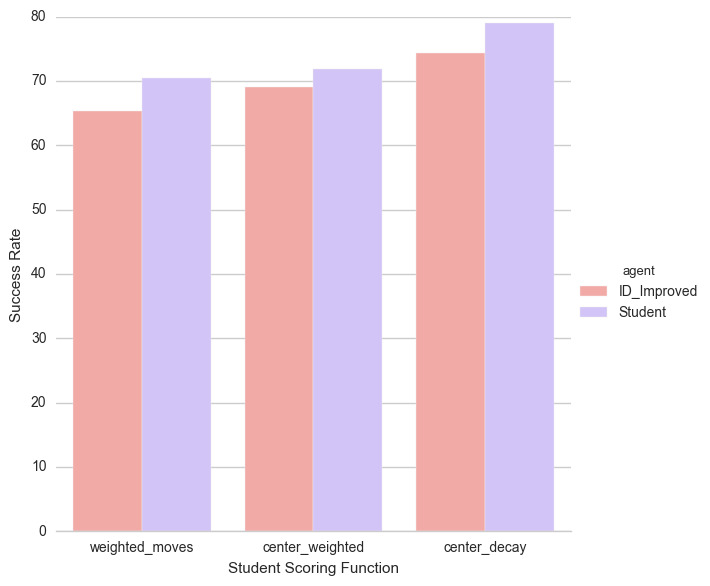

In [65]:
# Draw a nested barplot
sns.set(style="whitegrid")
g = sns.factorplot(x="student_scoring_function", y="Success_Rate", hue= 'agent',data= agg_results,
                   size=6, kind="bar",palette= test)
g.despine(left=True)
g.set_ylabels("Success Rate")
g.set_xlabels("Student Scoring Function")



In [66]:
g.savefig('success_rate.png')

In [8]:
match_results= pd.read_csv('match_results.csv')

In [9]:
match_results= match_results.sort_values('agent')

In [10]:
match_results.head()

,agent,scoring_function,student_scoring_function,opponent,agent_wins,opponent_wins,total_matches,round
0,ID_Improved,improved_score,weighted_moves,Random,83,17,100,1
34,ID_Improved,improved_score,center_decay,AB_Improved,100,0,100,3
33,ID_Improved,improved_score,center_decay,AB_Open,74,26,100,3
32,ID_Improved,improved_score,center_decay,AB_Null,74,26,100,3
31,ID_Improved,improved_score,center_decay,MM_Improved,54,46,100,3


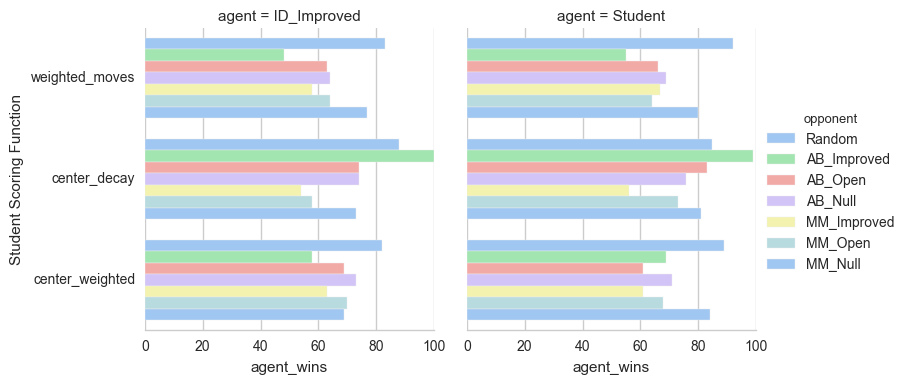

In [63]:
# Draw a nested barplot
sns.set(style="whitegrid")
g = sns.factorplot(y="student_scoring_function", x="agent_wins", hue= 'opponent', data= match_results,
                   kind="bar", col= 'agent', palette="pastel", orient= 'h')
g.despine(left=True)
g.set_ylabels("Student Scoring Function")

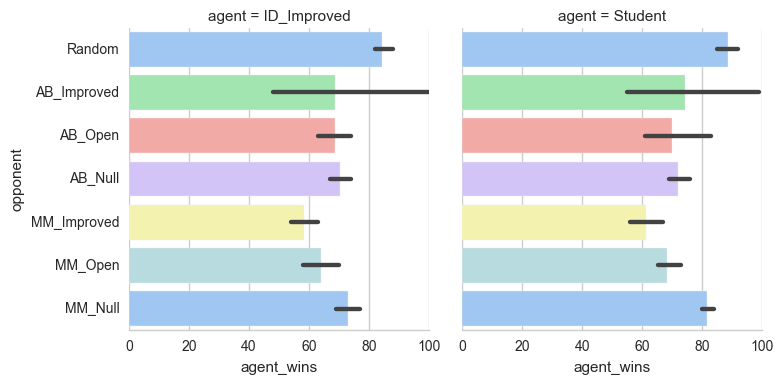

In [64]:
# Draw a nested barplot
sns.set(style="whitegrid")
g = sns.factorplot(y="opponent", x="agent_wins", data= match_results,
                   kind="bar", col= 'agent', palette="pastel", orient= 'h')
g.despine(left=True)
g.set_ylabels("opponent")

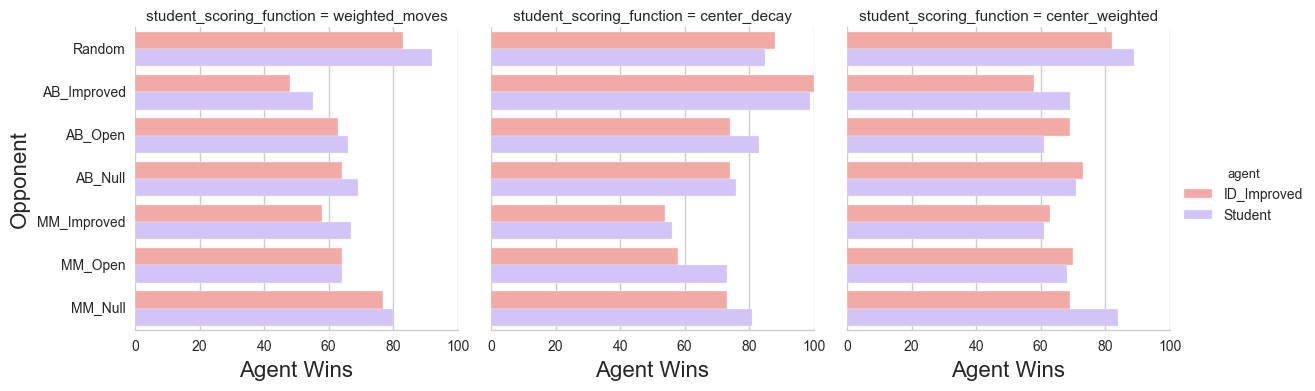

In [56]:
# Draw a nested barplot
sns.set(style="whitegrid")
f = sns.factorplot(y="opponent", x="agent_wins", hue= 'agent',data= match_results,
                   kind="bar", col= 'student_scoring_function',palette= test, orient= 'h')
f.despine(left=True)
f.set_ylabels("Opponent", size= 16)
f.set_xlabels("Agent Wins", size= 16)

In [61]:
f.savefig('win_counts.png')

In [14]:
grouped_match= match_results.groupby(['agent','student_scoring_function', 'round']).sum()

In [15]:
grouped_match

agent_wins  opponent_wins  \
agent       student_scoring_function round                              
ID_Improved center_decay             3             521            179   
            center_weighted          2             484            216   
            weighted_moves           1             457            243   
Student     center_decay             3             553            147   
            center_weighted          2             503            197   
            weighted_moves           1             493            207   

                                            total_matches  
agent       student_scoring_function round                 
ID_Improved center_decay             3                700  
            center_weighted          2                700  
            weighted_moves           1                700  
Student     center_decay             3                700  
            center_weighted          2                700  
            weighted_moves           1                700

In [16]:
match_counts= grouped_match.reset_index()
match_counts= match_counts.sort_values(by= 'round')

In [17]:
match_counts

,agent,student_scoring_function,round,agent_wins,opponent_wins,total_matches
2,ID_Improved,weighted_moves,1,457,243,700
5,Student,weighted_moves,1,493,207,700
1,ID_Improved,center_weighted,2,484,216,700
4,Student,center_weighted,2,503,197,700
0,ID_Improved,center_decay,3,521,179,700
3,Student,center_decay,3,553,147,700


In [18]:
from statsmodels.stats.proportion import proportions_ztest

In [19]:
match_counts

,agent,student_scoring_function,round,agent_wins,opponent_wins,total_matches
2,ID_Improved,weighted_moves,1,457,243,700
5,Student,weighted_moves,1,493,207,700
1,ID_Improved,center_weighted,2,484,216,700
4,Student,center_weighted,2,503,197,700
0,ID_Improved,center_decay,3,521,179,700
3,Student,center_decay,3,553,147,700


In [20]:
457-493

-36

In [21]:
484-503

-19

In [22]:
521-553

-32

In [23]:
# returns zstat, pval
proportions_ztest(36,700,0)

(6.1605038129130048, 7.2513869142401593e-10)

In [24]:
proportions_ztest(19,700,0)

(4.4192875885163536, 9.9026797620907775e-06)

In [25]:
proportions_ztest(32,700,0)

(5.7907628281372849, 7.0067459938933635e-09)